## 1 Employee_survey_data missing data

### we don't need to add missing data in employee_survey_data
 - it's not revealing
 - mean and median may cause a problem for the rest of the analysis
### Type of Data
- data in employee_survey_data are only an integer (1,2,3 or 4)

In [3]:
#Library importation

import numpy as np
import pandas as pd
import matplotlib as plt

In [4]:
general_data = pd.read_csv('general_data.csv')

#Last assessment provided by the manager
manager_survey_data = pd.read_csv('manager_survey_data.csv')

#Survey on the quality of life at work
employee_survey_data = pd.read_csv('employee_survey_data.csv')

#Working hours
out_time_data = pd.read_csv('out_time.csv')
in_time_data = pd.read_csv('in_time.csv')


Check missing data in employee_survey_data

In [55]:
import pandas as pd
# Check for missing values
print(employee_survey_data.isna().sum())  # Shows the count of NaNs in each column

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64


In [56]:
nan_rows = employee_survey_data[employee_survey_data.isna().any(axis=1)]
print(nan_rows)  # Displays rows with at least one NaN

      EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
11            12                      NaN              4.0              3.0
40            41                      3.0              NaN              3.0
84            85                      3.0              4.0              NaN
111          112                      NaN              2.0              3.0
124          125                      3.0              NaN              3.0
...          ...                      ...              ...              ...
4219        4220                      2.0              NaN              3.0
4305        4306                      2.0              2.0              NaN
4332        4333                      NaN              4.0              3.0
4345        4346                      4.0              NaN              4.0
4409        4410                      1.0              3.0              NaN

[83 rows x 4 columns]


show info about the file employee_survey_data

In [44]:
employee_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


array([[<Axes: title={'center': 'EmployeeID'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'WorkLifeBalance'}>]], dtype=object)

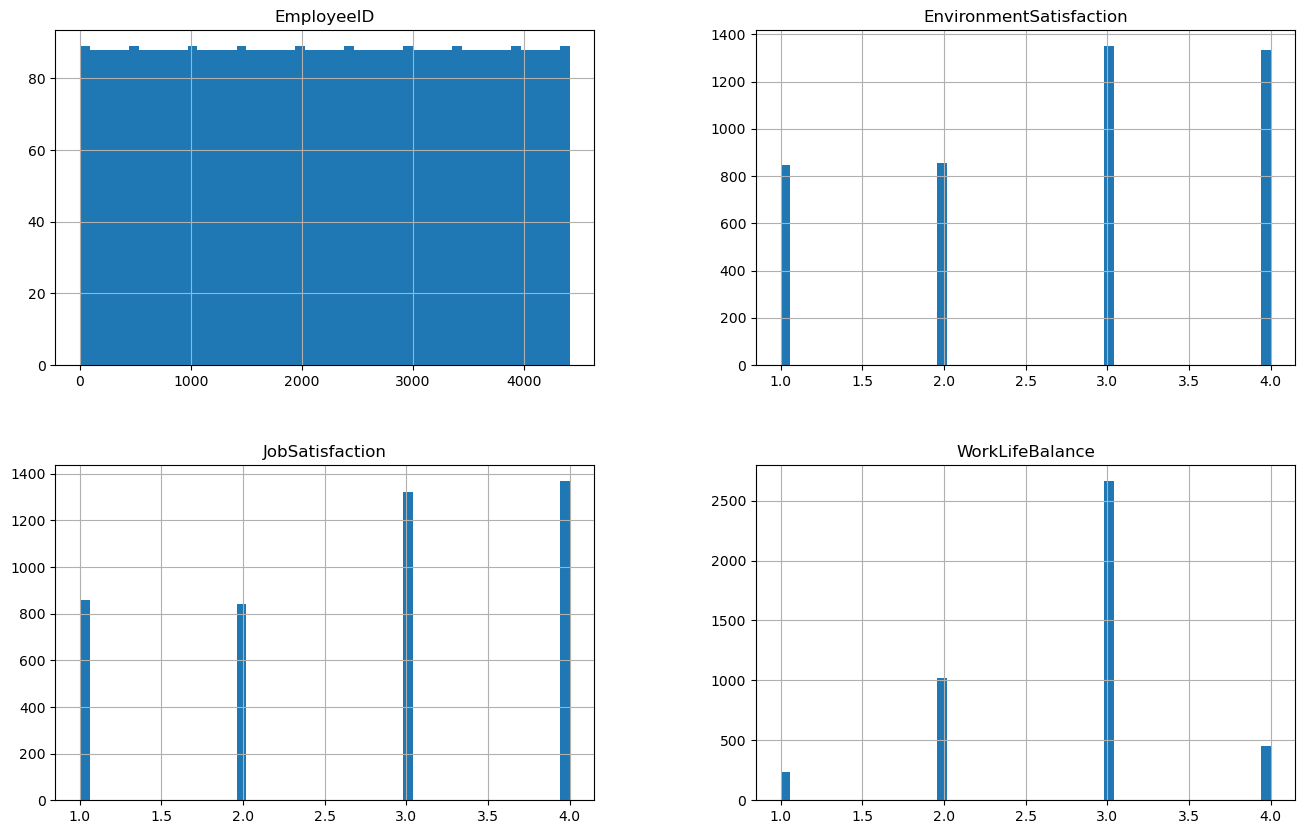

In [45]:
employee_survey_data.hist(bins=50, figsize=(16, 10))

these graph tell us , it's not possible to use Mean because the result must be an integer , median can be better.
finally we decide to don't add missing values , satisfaction can't be added because we don't know the personal satisfaction of each person. 

## 1.2 General_data missing data
### Linear regression 
- we decide to use linear regresion to add missing data but no sufficient corealiation was found
### Mean and Median
- we finaly use Mean or Median to add msising data , it's more relevant.

In [68]:
general_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [64]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

We decide to find a corelation between NumCompaniesWorked and other columns to use linear regresion 

In [65]:
corr_matrix = general_data.corr(numeric_only=True)

corr_matrix["NumCompaniesWorked"].sort_values(ascending=False)

NumCompaniesWorked         1.000000
Age                        0.299243
TotalWorkingYears          0.238807
PercentSalaryHike          0.030860
StockOptionLevel           0.017163
EmployeeID                -0.001117
JobLevel                  -0.009875
DistanceFromHome          -0.013843
Education                 -0.016250
MonthlyIncome             -0.020726
TrainingTimesLastYear     -0.032286
YearsSinceLastPromotion   -0.036656
YearsWithCurrManager      -0.109667
YearsAtCompany            -0.117959
EmployeeCount                   NaN
StandardHours                   NaN
Name: NumCompaniesWorked, dtype: float64

No sufficient corelation between 'NumCompaniesWorked' and other column so we decide to use mean or median

In [66]:
mean_value = general_data["NumCompaniesWorked"].mean()

median_value = general_data["NumCompaniesWorked"].median()

print("Mean :", mean_value.round())
print("Median :", median_value)

Mean : 3.0
Median : 2.0


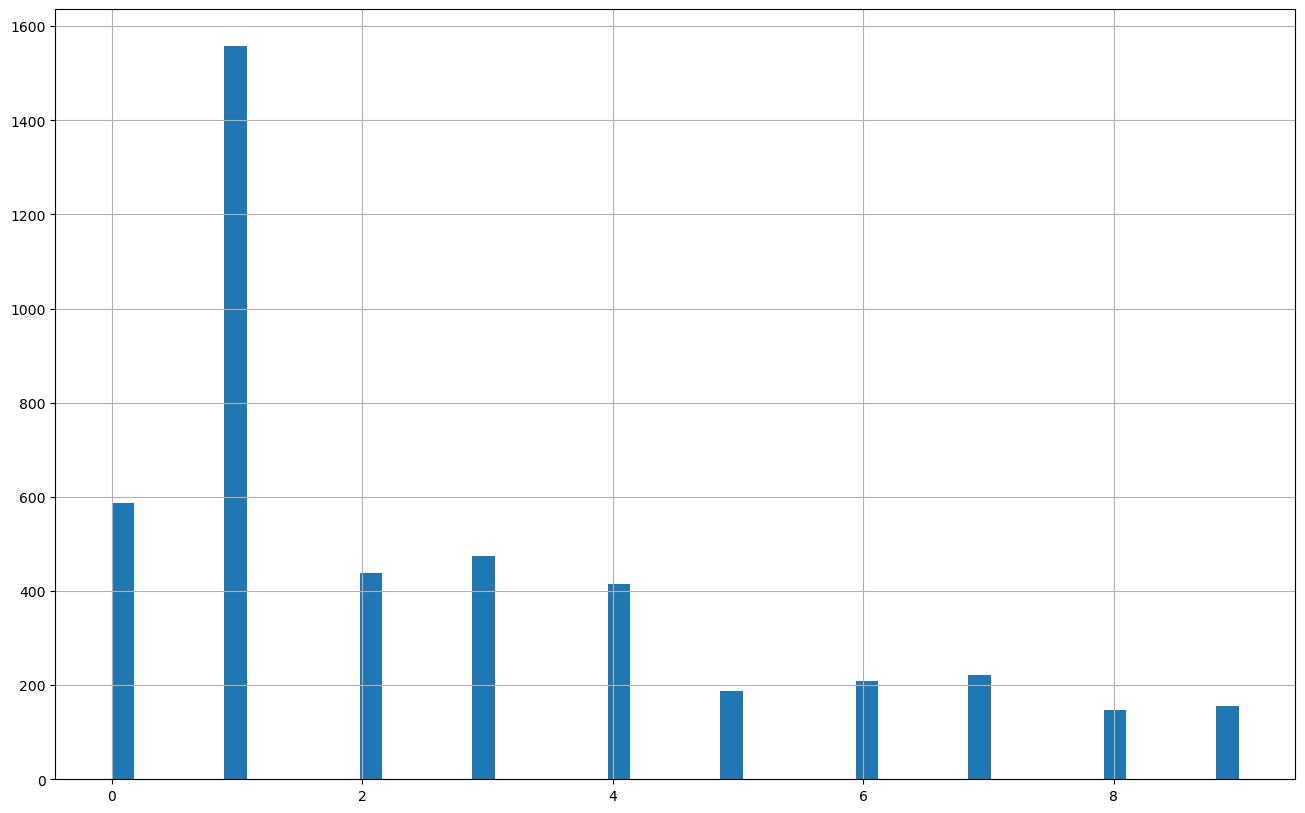

In [67]:
general_data["NumCompaniesWorked"].hist(bins=50,figsize=(16,10))

plt.show()